In [73]:
#Importando las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

In [64]:
#Generando los datos
X1, y1 = make_classification(
    n_samples=2000,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    shuffle=False
)

In [65]:
#Diviendo los datos
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=0
)

In [86]:
#creando el modelo
boosting_model1 = GradientBoostingClassifier(
    n_estimators=132,
    learning_rate=1.0,
    max_depth=1,
    random_state=0
)

In [87]:
#Entrenando el modelo
boosting_model1=boosting_model1.fit(X1_train, y1_train)

In [93]:
#Se inicia la evaluación del modelo
matriz_confusion =confusion_matrix(
    y_true=y1_test,
    y_pred=boosting_model1.predict(X1_test)
)

puntuacion = boosting_model1.score(
    X=X1_test,
    y=y1_test
)*100

print('la puntuacion es: {:.2f}%'.format(puntuacion))
print('La matriz de confucion es:\n{}'.format(matriz_confusion))

la puntuacion es: 98.33%
La matriz de confucion es:
[[302   6]
 [  4 288]]


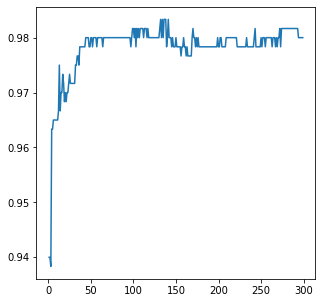

In [82]:
#Evaluando gráficamente el desempeño del algoritmo
puntajes = {}
for i in range(1,300):
    #Crear el algoritmo
    boosting_model1 = GradientBoostingClassifier(
        n_estimators=i,
        learning_rate=1.0,
        max_depth=1,
        random_state=0
    )
    #Entrenando el modelo
    boosting_model1=boosting_model1.fit(X1_train, y1_train)
    #Evaluar el algoritmo
    puntajes[i] = boosting_model1.score(
        X=X1_test,
        y=y1_test
    )

#Se grafica los resultados
plt.figure(figsize=(5,5))
plt.plot(list(puntajes.keys()),list(puntajes.values()))
plt.show()
    

In [95]:
estimador = 0
for key,value in puntajes.items():
    if value == max(puntajes.values()):
        estimador = key
        break
print('El estimador con mejor resultado es: {0}'.format(estimador))

El estimador con mejor resultado es: 132
